In [5]:
# @title HW 1
# @markdown Student Info
# @markdown Name: [Skyler Thomas]
# @markdown JHED-ID: [sthom215]

# @markdown Load up the calcium image video in the file: TEST MOVIE 00001-small-motion.tif. This file represents the raw fluorescence video in TIF format, common for calcium imaging.

import os
from pathlib import Path
home = Path.cwd()

# Problem 2: Summary images. 

Load up the calcium image video in the file: $\texttt{TEST MOVIE 00001-small.tif}$. This file represents the raw fluorescence video in TIF format, but without the motion. One of the most common ways that people analyze functional data is to try to identify individual cells in the data in a “summary image”. A summary image condenses an entire video sequence into a single image, wherein each pixel represents a summary of the entire time-trace at the location of that pixel in the video.

## Part B


* ### What would you expect a good statistic for a summary image to capture?


A good statistic for a summary image should provide an overview of the content across all of the frames in movies across time. So I should have an idea of not only color but of shape and even changes in hue.


* ### What other statistics would you think could work? 


An image that summarizes the average shape across all images could be a summary. An image that summarizes the average edges across all images could also work. A plot that shows the average distribution across pixels.

In [6]:
# @title check and load images. 
import tifffile

dir = os.listdir()
tiff1 = 'TEST_MOVIE_00001-small-motion.tif'

if tiff1 not in dir:
    if 'content' in str(Path.cwd().resolve()):
        print("On gogle colab, mounting drive")
        from google.colab import drive
        drive.mount('/content/drive')
        cwd = home /'drive/MyDrive/NSC_HW1'
        movie = tifffile.imread(cwd/tiff1)
    elif 'skyler' in str(Path.cwd().resolve()):
        print("On skyler's computer, looking for file in work directory")
        for path, dirs, files in os.walk(home.parent):
            cwd = Path(path)
            if tiff1 in files:
                movie = tifffile.imread(cwd/tiff1)
            else:
                continue
    else:
        print('file not found, please set home to the correct directory.')

else:
  movie = tifffile.imread(home/tiff1)

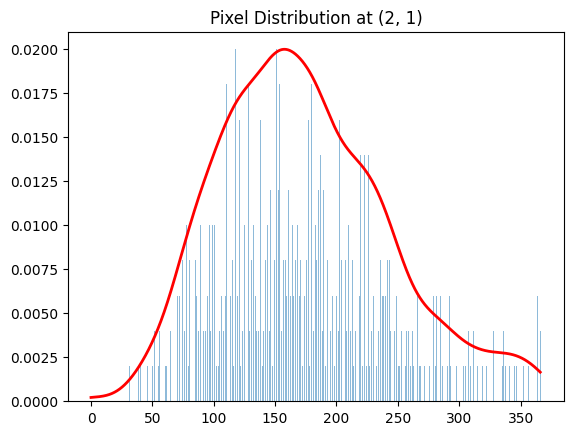

In [7]:
# @title Get pixel distribution at a single pixel across the entire movie
_, height, width = movie.shape

x_coord = 0 # @param {type:"slider", min:0, max:width, step:1}
y_coord = 0 # @param {type:"slider", min:0, max:height, step:1}

from sthom215_problem_2_ex_2 import get_pixelDistribution
#sigma controls smoothing of the distribution
get_pixelDistribution(movie, 2 ,1, sigma=15) 

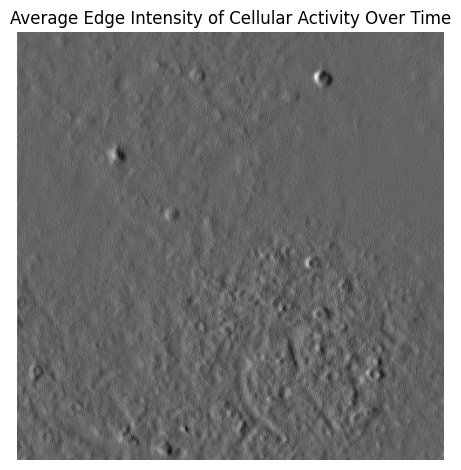

In [11]:
# @title Edge detection summary
from sthom215_problem_2_ex_2 import get_edge_mean
import matplotlib.pyplot as plt

plt.imshow(get_edge_mean(movie), cmap='gray')
plt.title("Average Edge Intensity of Cellular Activity Over Time")
plt.axis('off')
plt.tight_layout()

### Were you right? 

I think my pixel approach is interesting but the scale is too small to be useful across an entire movie. It is better suited to studying the statistics of an image at a single frame. 

I think my edge detetction approach is a decent summary because it gives the viewer an idea of active areas of change across all of the frames in the movie. 
